In [39]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

In [40]:
k = 1000000
p1 = 0.5
p2 = 0.1
x1 = np.random.binomial(n=20,p=p1,size=k) 
x2 = np.random.binomial(n=20,p=p2,size=k)
mean1 = x1 / 20 # 1000000 E(X)
mean2 = x2 / 20 # 1000000 E(X)

In [41]:
alpha1 = np.arange(0.5,1.05,0.05)
alpha1 = np.around(alpha1,2)
alpha2 = np.arange(0.1,1.05,0.05)
alpha2 = np.around(alpha2,2)

In [42]:
def greaterprob(mean,alpha): 
    stroeper = []
    for i in alpha: 
        num = np.sum(mean>=i) #count if >= alpha
        percent = num / k
        stroeper.append(percent)
    stroeper = np.array(stroeper) * 100
    #print(percent)
    return stroeper

In [43]:
def Markov(mean,alpha): 
    ex = np.mean(mean)
    stroemark = []
    for j in alpha:
      Marbound = ex/j
      stroemark.append(Marbound)
    stroemark = np.array(stroemark) * 100
    #print(Marbound)
    return stroemark

In [44]:
def Chebyshev(p,alpha): 
    varx = p*(1 - p) /20
    stroeche = []
    for k in alpha:
      if (k - p) == 0:
        Chebound = 1
      else:
        Chebound = varx/((k - p)**2)
        if Chebound > 1:
          Chebound = 1
      stroeche.append(Chebound)
    stroeche = np.array(stroeche) * 100
    #print(Marbound)
    return stroeche

In [45]:
prob1 = greaterprob(mean1,alpha1)
markovs1 = Markov(mean1,alpha1)
Cheb1 = Chebyshev(p1,alpha1)

prob2 = greaterprob(mean2,alpha2)
markovs2 = Markov(mean2,alpha2)
Cheb2 = Chebyshev(p2,alpha2)

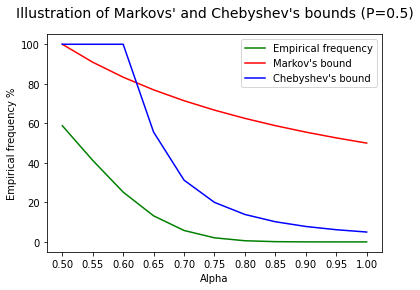

In [46]:
fig1, ax1 = plt.subplots()
xaxis1 = np.arange(0.5,1.05,0.05)
ax1.plot(xaxis1, prob1, 'g', label='Empirical frequency')
ax1.plot(xaxis1, markovs1, 'r', label='Markov\'s bound')
ax1.plot(xaxis1, Cheb1, 'b', label='Chebyshev\'s bound')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Empirical frequency %')
plt.xticks(xaxis1)
ax1.set_title('Illustration of Markovs\' and Chebyshev\'s bounds (P=0.5)', fontsize=14, position=(0.5,1.05))
ax1.legend();
#plt.savefig('Assignment1_Question2_Plot1.pdf')
plt.show()

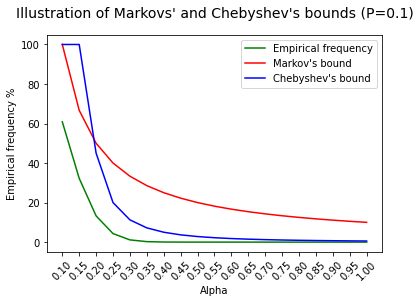

In [48]:
fig2, ax2 = plt.subplots()
xaxis2 = np.arange(0.1,1.05,0.05)
ax2.plot(xaxis2, prob2, 'g', label='Empirical frequency')
ax2.plot(xaxis2, markovs2, 'r', label='Markov\'s bound')
ax2.plot(xaxis2, Cheb2, 'b', label='Chebyshev\'s bound')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('Empirical frequency %')
plt.xticks(xaxis2,rotation=45)
ax2.set_title('Illustration of Markovs\' and Chebyshev\'s bounds (P=0.1)', fontsize=14, position=(0.5,1.05))
ax2.legend();
#plt.savefig('Assignment1_Question2_Plot2.pdf')
plt.show()